In [164]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import ROOT
from ROOT import TChain, TTree,TCanvas,TH1F,TList,TFile,TH2F,TPaveLabel,TPaveText,TLorentzVector,TLegend
import json

In [180]:
file_dir = '/work/nchernya/DiHiggs/inputs/newMicroAOD/fixedJEC/'
file_names = 'GluGluToHHTo2B2G_node_6_13TeV-madgraph,GluGluToHHTo2B2G_node_6_13TeV-madgraph_correctedcfg,GluGluToHHTo2B2G_node_6_TuneCP5_PSWeights_13TeV-madgraph-pythia8'.split(',')
years = '2016,2017,2018'.split(',')

plot_dir = '/work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/'

2016/2017/2018 Integrals :  0.417408812616   0.352481691516   0.360420098878


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


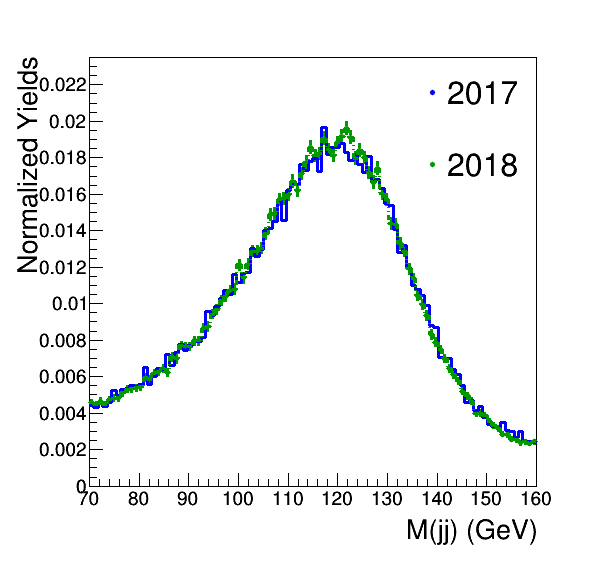

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


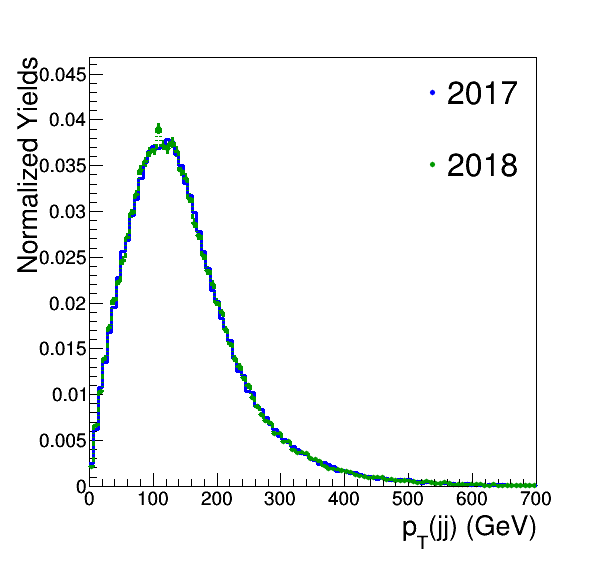

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


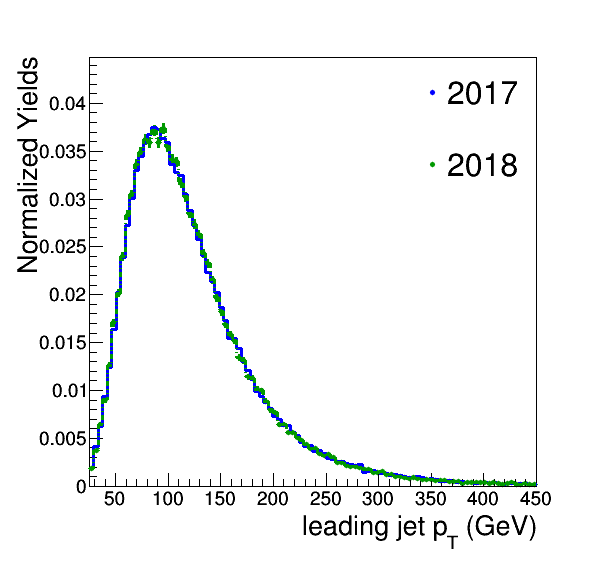

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


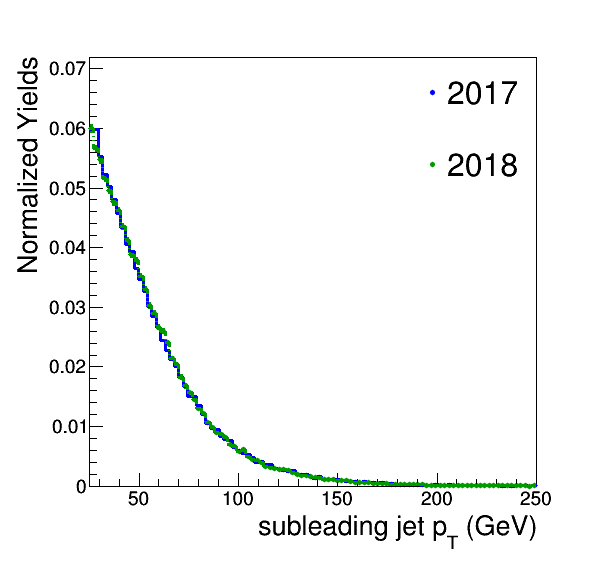

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


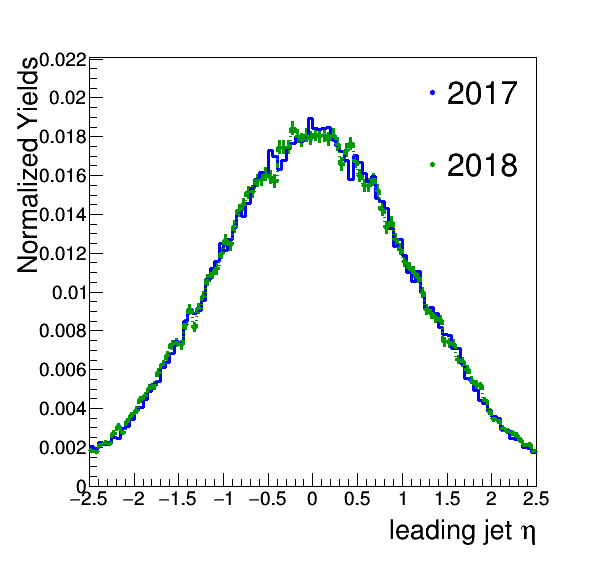

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


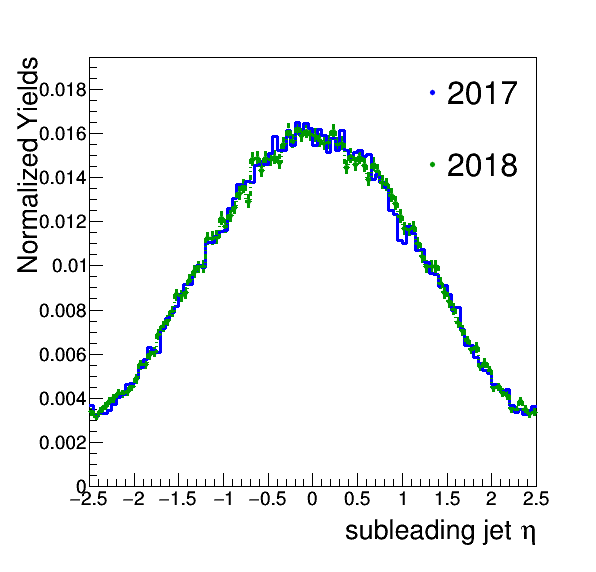

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


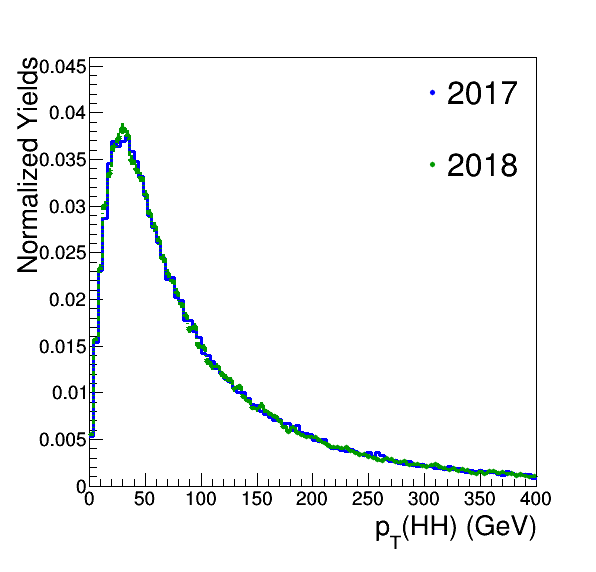

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


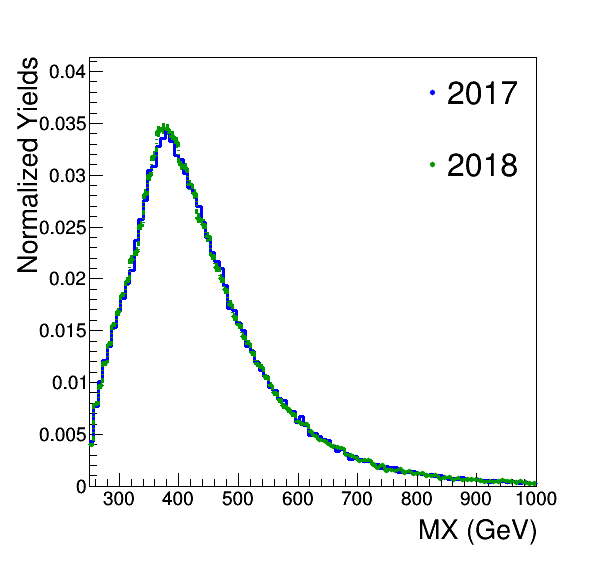

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


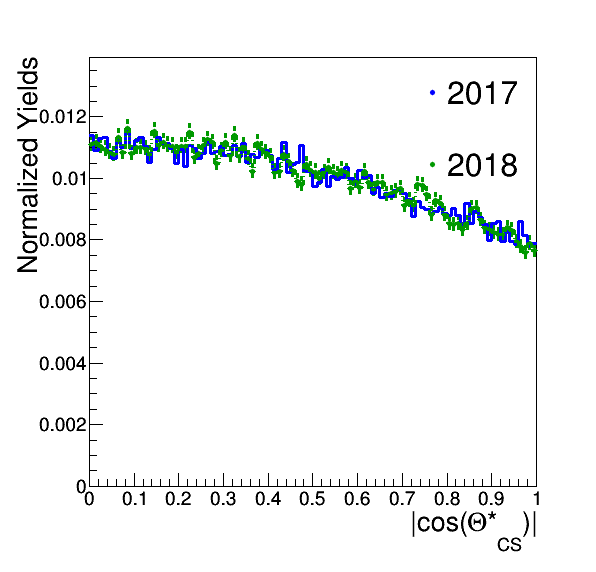

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


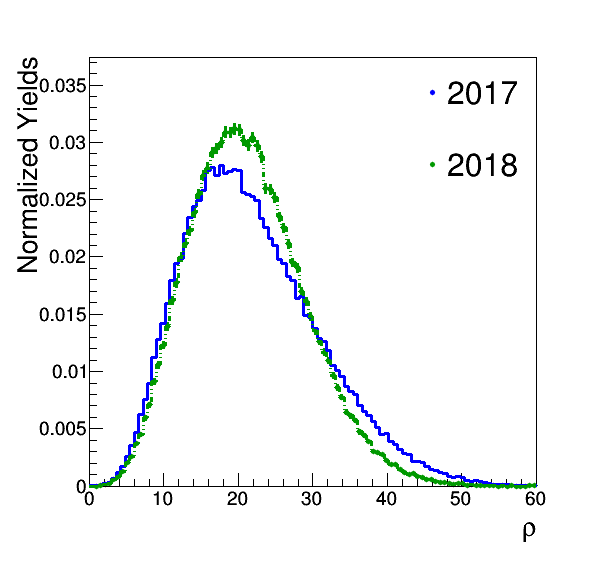

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


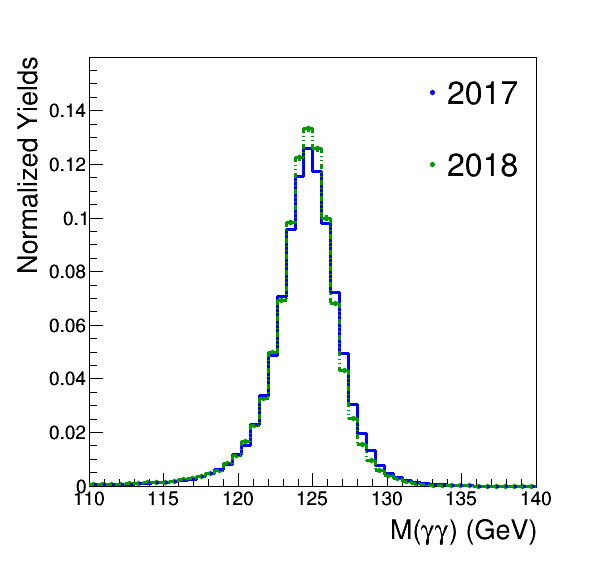

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


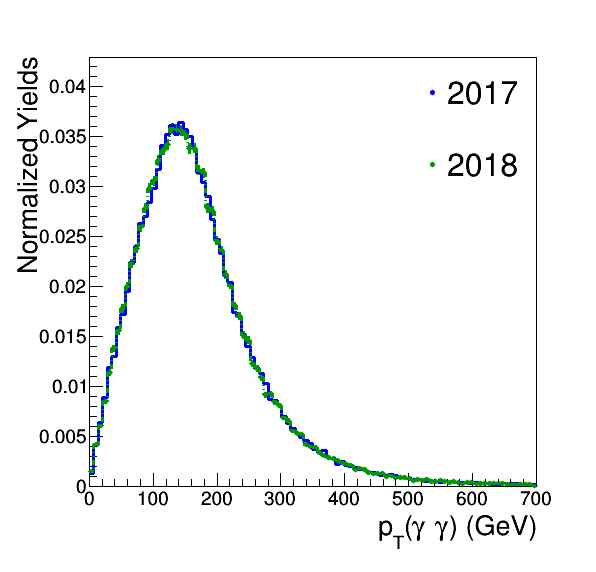

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


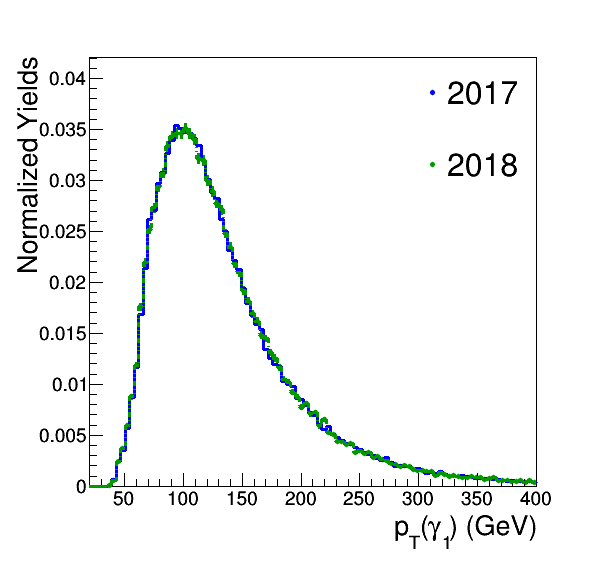

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


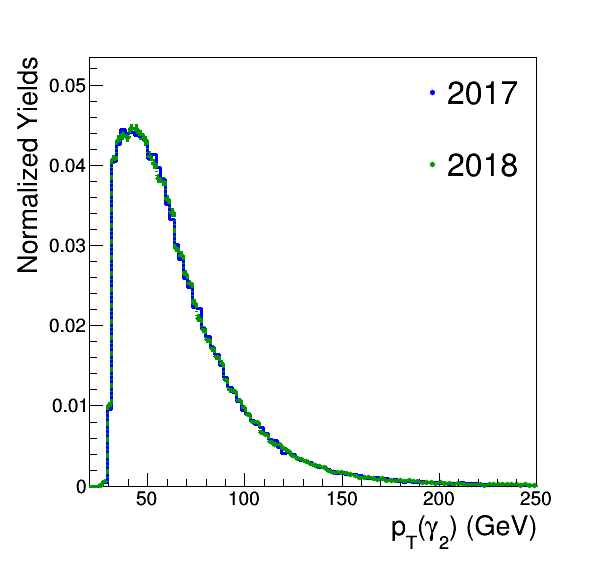

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


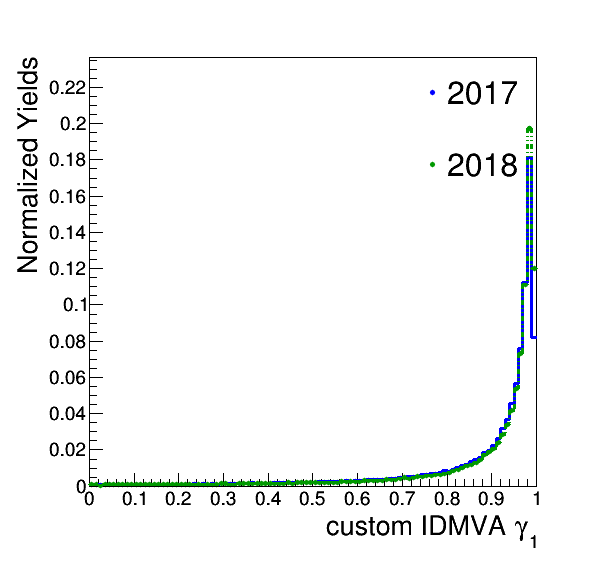

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


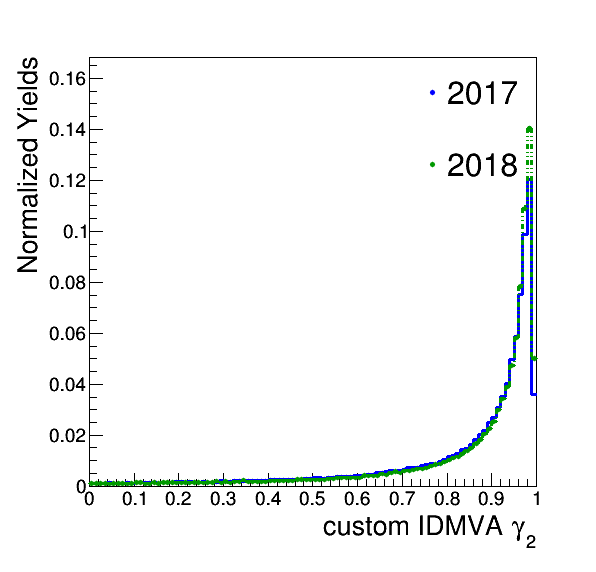

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


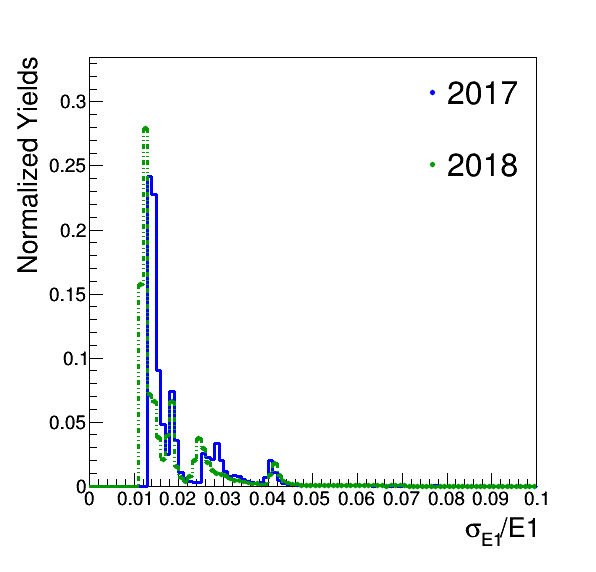

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


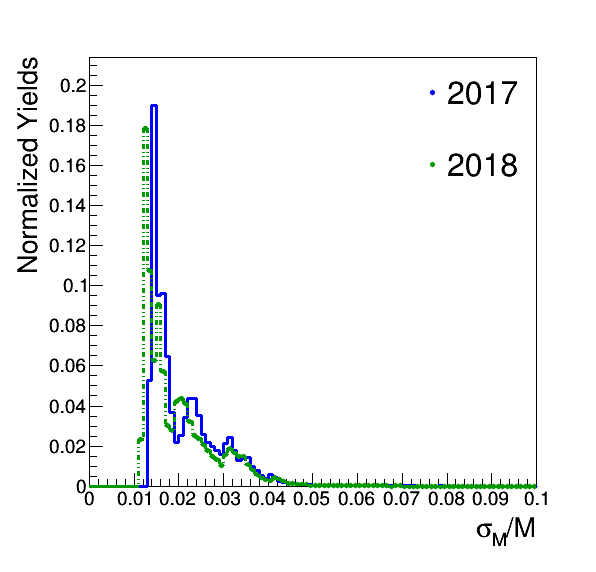

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


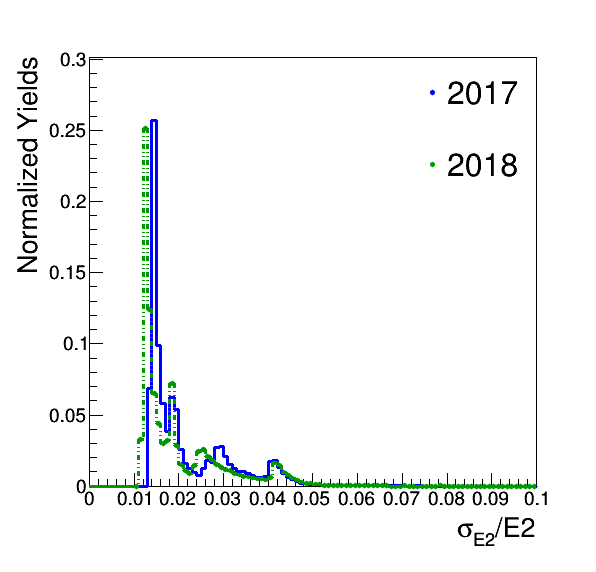

Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_Mjj_2017_2018.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_Mjj_2017_2018.png has been created
Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_dijet_pt_2017_2018.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_dijet_pt_2017_2018.png has been created
Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_leadingJet_pt_2017_2018.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_21_06_2019/comparison_leadingJet_pt_2017_2018.png has been created
Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_dev

In [181]:
sum=0.
#c = TCanvas("c","c",900,900)
#c.Divide(5,4)

infile_2016 = TFile(file_dir+'output_'+file_names[0]+"_2016.root")
infile_2017 = TFile(file_dir+'output_'+file_names[1]+"_2017.root")
infile_2018 = TFile(file_dir+'output_'+file_names[2]+"_2018.root")
tree_dir = 'tagsDumper/trees/'

hists_list_2016=[]

hists_list_2017=[]
hists_list_2018=[]

#distributions = 'Mjj,dijet_pt,diphoton_pt,diHiggs_pt,MX,CMS_hgg_mass,\
#rho,subleadingJet_pt,leadingJet_pt,sigmaMOverM,absCosThetaStar_CS,\
#customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,EGMLeadingPhotonIDMVA,EGMSubLeadingPhotonIDMVA,\
#leadingPhotonSigOverE,subleadingPhotonSigOverE,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution'.split(',')
#ranges =        [[70,160],[0,300],[0,400],[0,400],[250,1000],[70,160],
#                 [0,60],[25,250],[25,250],[0,0.1],[0,1],
#                 [0,1],[0,1],[0,1],[0,1],
#                [0,0.1],[0,0.1],[0,0.3],[0,0.3]]
#bins = 100

distributions = [['Mjj','M(jj) (GeV)',100,70,160],['dijet_pt','p_{T}(jj) (GeV)',100,0,700],
                     ['leadingJet_pt','leading jet p_{T} (GeV)',100,25,450], ['subleadingJet_pt','subleading jet p_{T} (GeV)',100,25,250], 
                    ['leadingJet_eta','leading jet #eta',100,-2.5,2.5],['subleadingJet_eta','subleading jet #eta',100,-2.5,2.5],
                    ['diHiggs_pt','p_{T}(HH) (GeV)',100,0,400], ['MX','MX (GeV)',100,250,1000],
                    ['absCosThetaStar_CS','|cos(#Theta*_{CS})|',100,0,1], ['rho','#rho',100,0,60],
                    ['CMS_hgg_mass','M(#gamma#gamma) (GeV)',50,110,140],['diphoton_pt','p_{T}(#gamma #gamma) (GeV)',100,0,700],
                    ['leadingPhoton_pt','p_{T}(#gamma_{1}) (GeV)',100,20,400], ['subleadingPhoton_pt','p_{T}(#gamma_{2}) (GeV)',100,20,250],
                    ['customLeadingPhotonIDMVA','custom IDMVA #gamma_{1}',100,0,1],['customSubLeadingPhotonIDMVA','custom IDMVA #gamma_{2}',100,0,1],
                    ['leadingPhotonSigOverE','#sigma_{E1}/E1',100,0,0.1],
                     ['sigmaMOverM','#sigma_{M}/M',100,0,0.1],
                    ['subleadingPhotonSigOverE','#sigma_{E2}/E2',100,0,0.1]] 
bins = 100 


for num in range(0,len(distributions)):
    c = TCanvas("c","c",600,600)
    c = TCanvas("c","c",600,600)
    c.SetLeftMargin(0.15)
    c.SetBottomMargin(0.15)
    #c.cd(num+1)
    
    dist = distributions[num][0]
    bins = distributions[num][2]
    xmin = distributions[num][3]
    xmax = distributions[num][4]
    
    tree_2016 = infile_2016.Get(tree_dir+file_names[0].replace('-','_')+'_13TeV_DoubleHTag_0')
    hist_2016 = TH1F("hist_2016_%s"%dist,"hist_2016_%s"%dist,bins,xmin,xmax)
    
    tree_2017 = infile_2017.Get(tree_dir+file_names[1].replace('-','_')+'_13TeV_DoubleHTag_0')
    hist_2017 = TH1F("hist_2017_%s"%dist,"hist_2017_%s"%dist,bins,xmin,xmax)
    
    tree_2018 = infile_2018.Get(tree_dir+file_names[2].replace('-','_')+'_13TeV_DoubleHTag_0')
    hist_2018 = TH1F("hist_2018_%s"%dist,"hist_2018_%s"%dist,bins,xmin,xmax)
    
    tree_2016.Draw("%s>>hist_2016_%s"%(dist,dist),"weight")
    tree_2017.Draw("%s>>hist_2017_%s"%(dist,dist),"weight")
    tree_2018.Draw("%s>>hist_2018_%s"%(dist,dist),"weight")
    
    if num==0 : print '2016/2017/2018 Integrals : ',hist_2016.Integral(0,bins+1),' ',hist_2017.Integral(0,bins+1),' ',  hist_2018.Integral(0,bins+1)
    
    hist_2016.Scale(1./hist_2016.Integral())
    hist_2017.Scale(1./hist_2017.Integral())
    hist_2018.Scale(1./hist_2018.Integral())

    hist_2016.SetLineColor(2)
    hist_2016.SetMarkerColor(2)
    hist_2017.SetLineColor(4)
    hist_2017.SetMarkerColor(4)
    hist_2018.SetLineColor(ROOT.kGreen+2)
    hist_2018.SetMarkerColor(ROOT.kGreen+2)
    hist_2018.SetLineStyle(8)


    ROOT.gStyle.SetOptTitle(1)
    ROOT.gStyle.SetOptStat(0)
    hist_2018.SetTitle('')
    #hist_2018.GetXaxis().SetTitleSize(.08) #for all plots on one canvas
    #hist_2018.GetYaxis().SetTitleSize(.08)#for all plots on one canvas
    hist_2018.GetXaxis().SetTitleSize(.05) 
    hist_2018.GetYaxis().SetTitleSize(.05) 
    hist_2018.GetYaxis().SetTitleOffset(1.3) 
    hist_2018.GetXaxis().SetTitle('%s'%distributions[num][1])
    hist_2018.GetYaxis().SetTitle('Normalized Yields')
    hist_2018.GetYaxis().SetRangeUser(0,hist_2018.GetMaximum()*1.2)

    
   # hist_2016.Draw("HISTsame")
   # hists_list_2016.append(hist_2016)
    hist_2017.Draw("HISTsame")
    hists_list_2017.append(hist_2017)
    hist_2018.Draw("HISTsame")
    hists_list_2018.append(hist_2018)
    
    leg = ROOT.TLegend(0.7,0.65,0.9,0.9)
   # leg.AddEntry(hist_2016,"2016" ,"P")
    leg.AddEntry(hist_2017,"2017" ,"P")
    leg.AddEntry(hist_2018,"2018" ,"P")
    leg.SetFillStyle(-1)
    leg.SetBorderSize(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.06)
    leg.Draw("same")
    c.Draw()
    c.SaveAs(plot_dir+'comparison_%s_2017_2018.pdf'%dist)
    c.SaveAs(plot_dir+'comparison_%s_2017_2018.png'%dist)
#c.Draw()
#c.SaveAs(plot_dir+'all.pdf')
#c.SaveAs(plot_dir+'all.png')

## Compare 94X ntuples with 102 ntuples (with DeepFlavour) for 2017

In [162]:
file_94 = '/work/nchernya/DiHiggs/inputs/newMicroAOD/2017/output_node_9_94X.root'
file_102 = '/work/nchernya/DiHiggs/inputs/newMicroAOD/2017/output_node_9_102X.root'

94/102 Integrals :  0.435269741807   0.42181062384


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


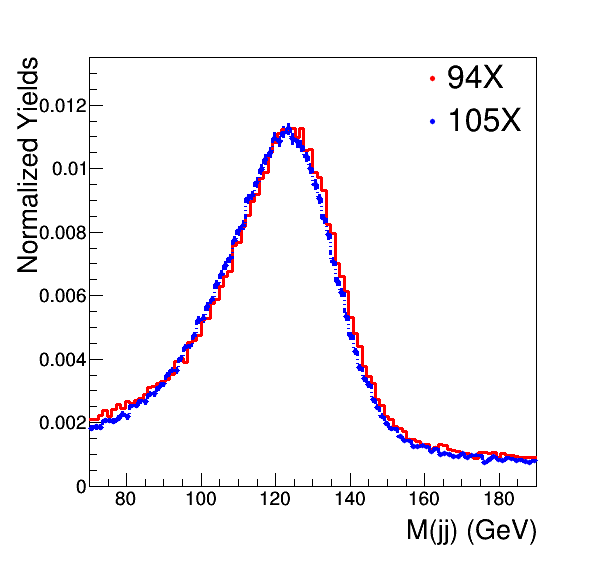

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


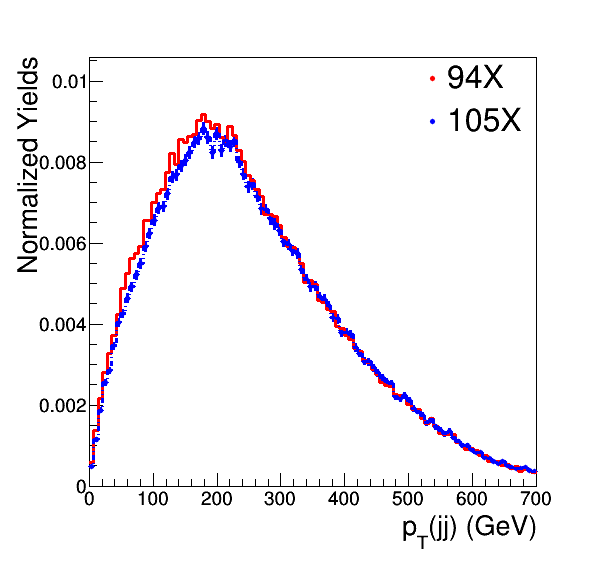

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


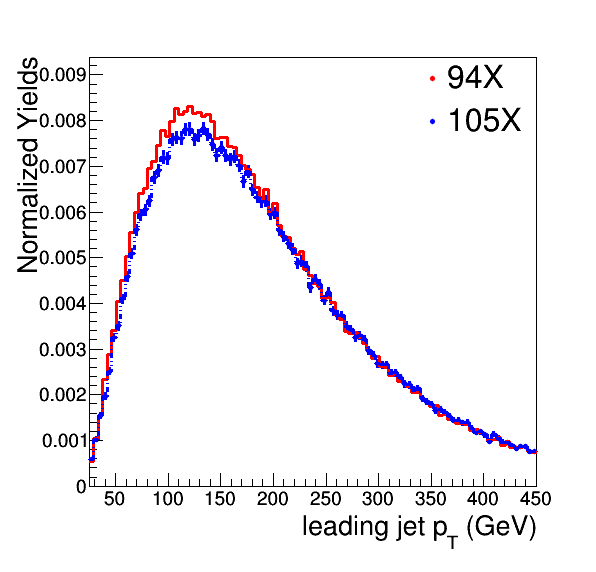

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


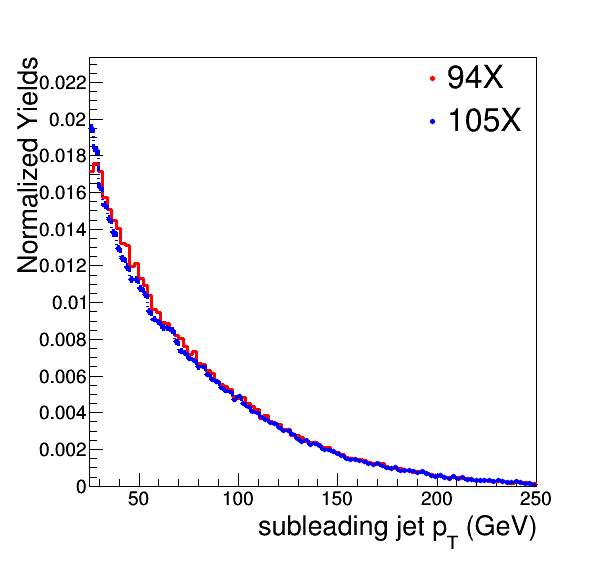

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


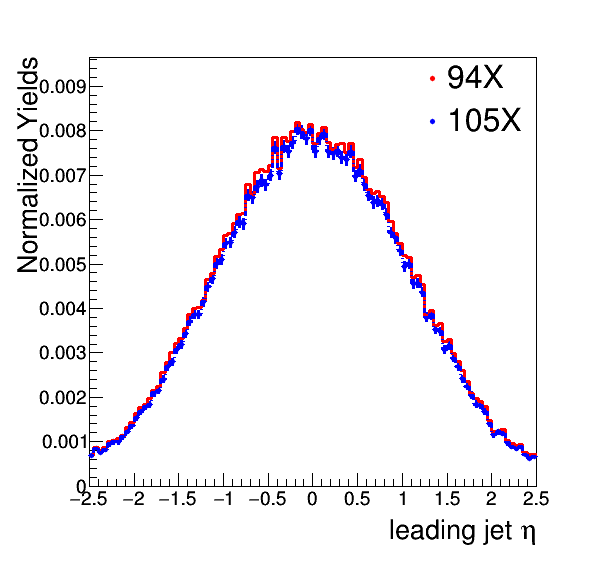

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


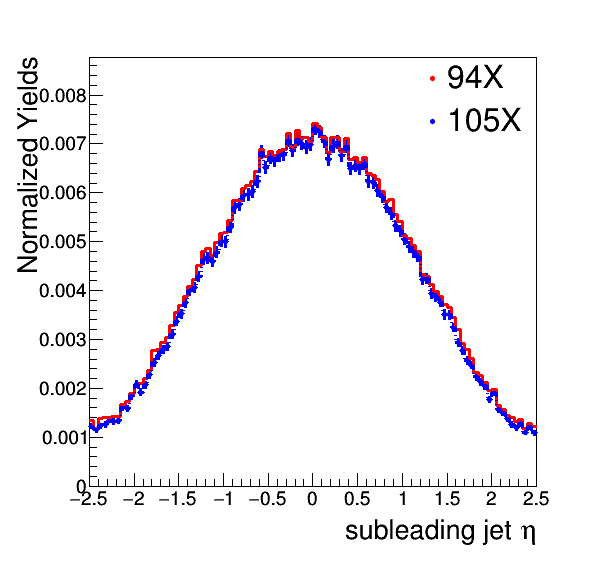

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


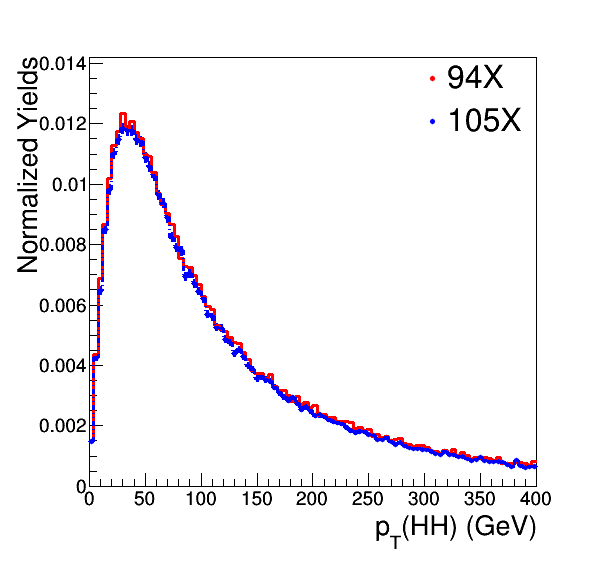

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


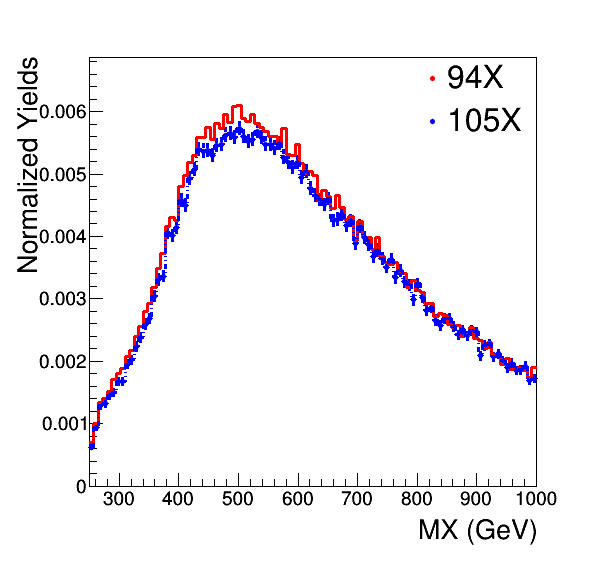

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


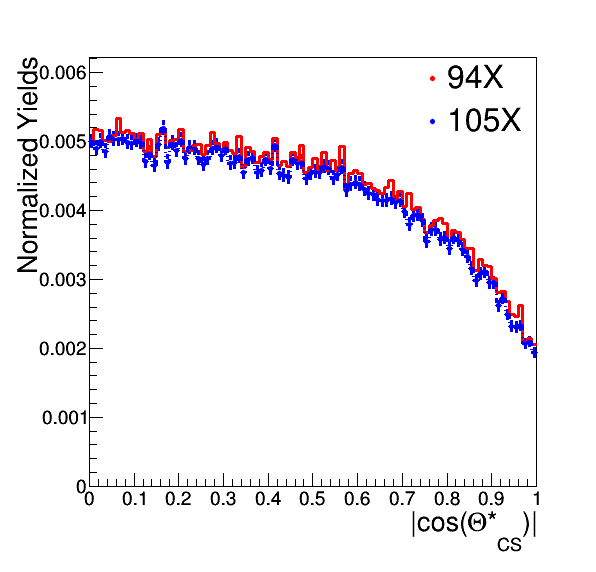

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


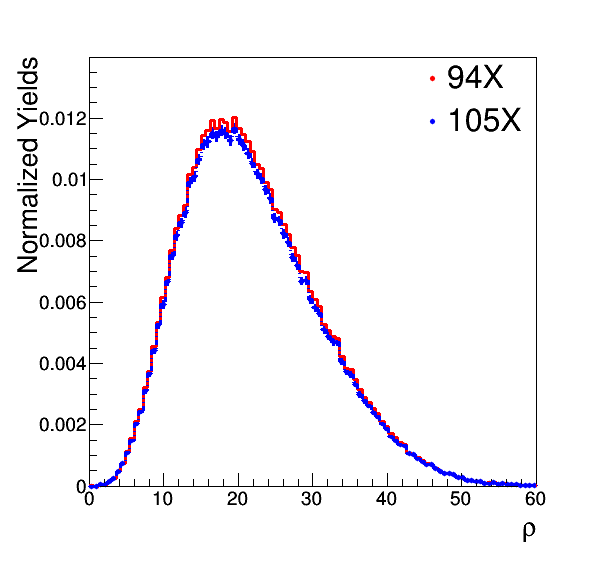

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


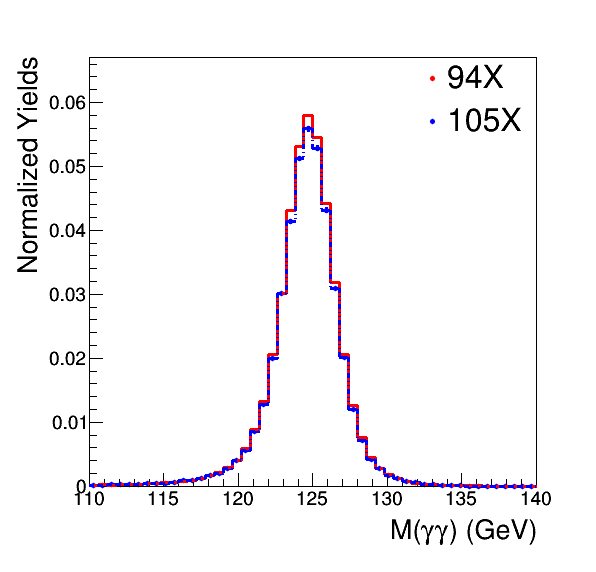

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


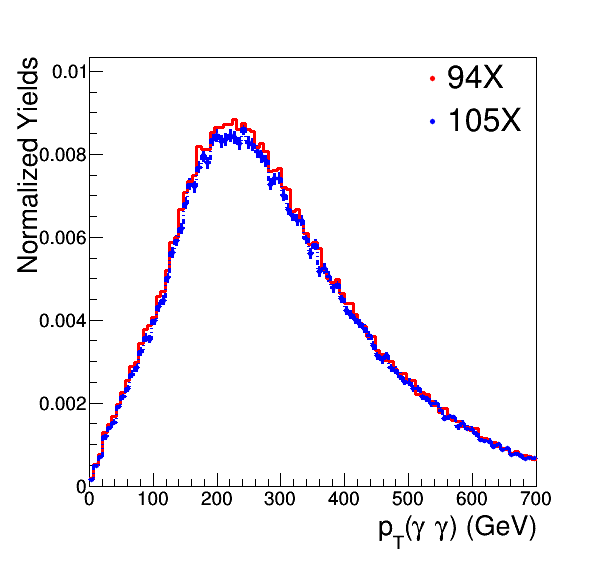

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


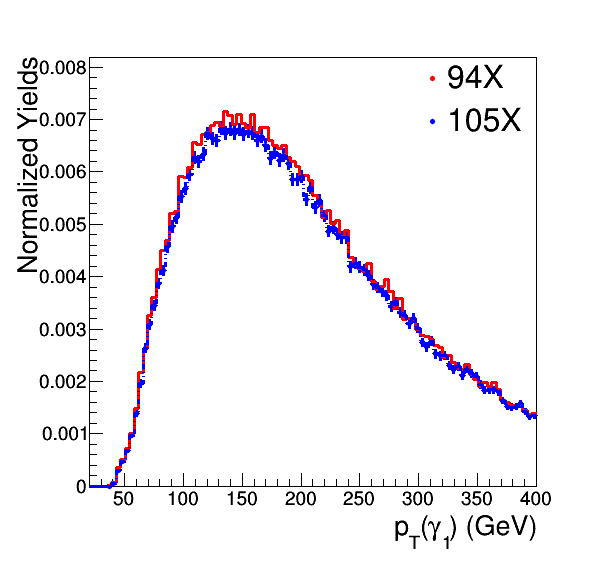

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


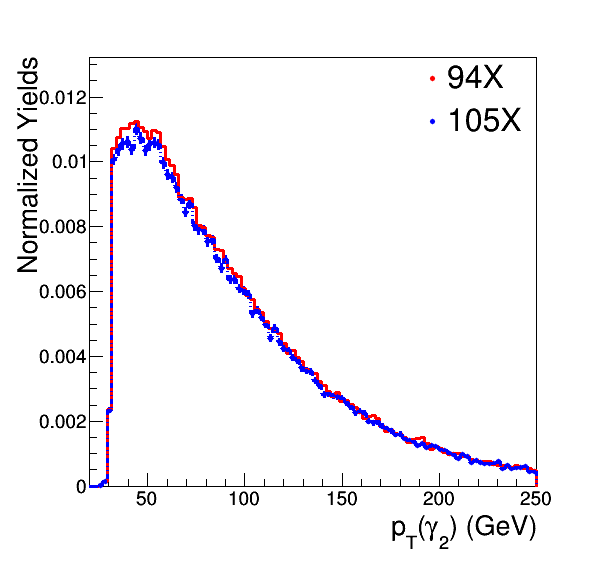

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


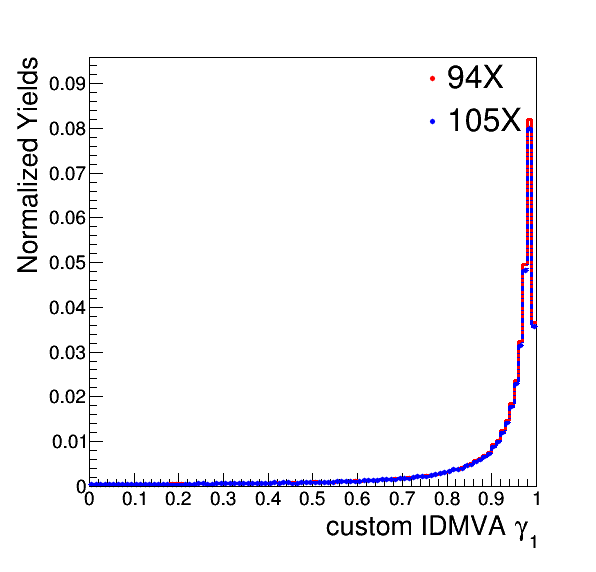

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


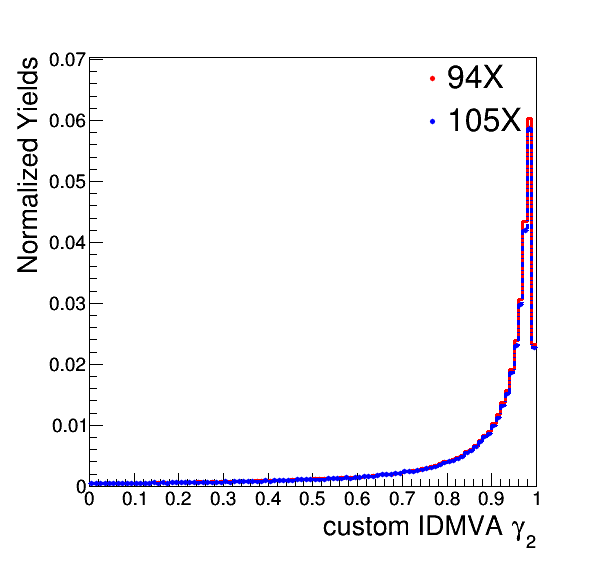

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


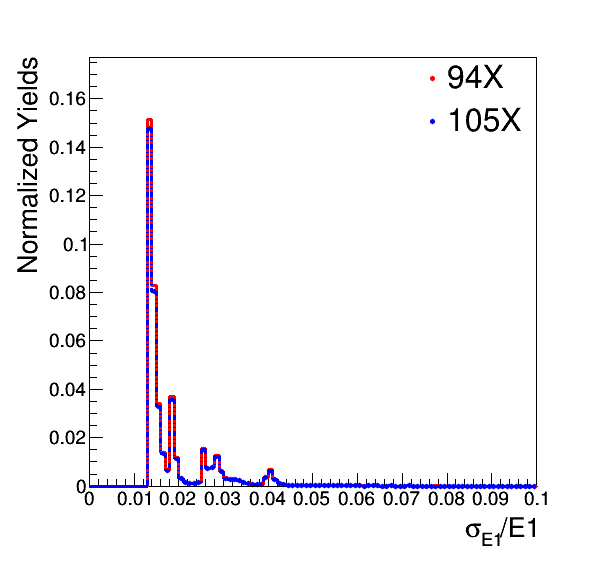

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


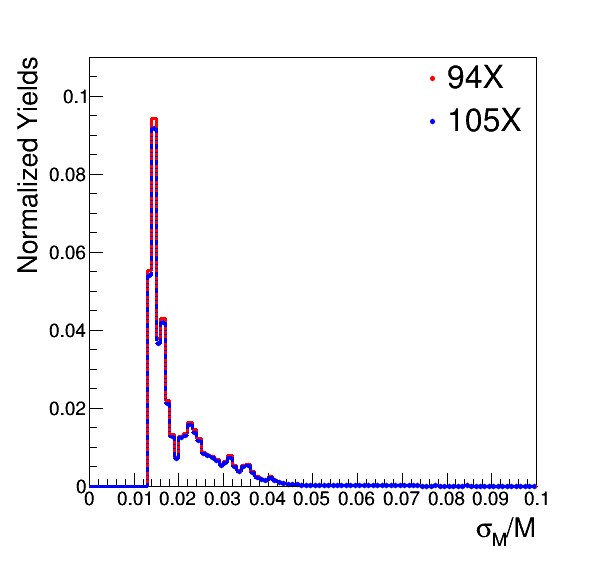

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


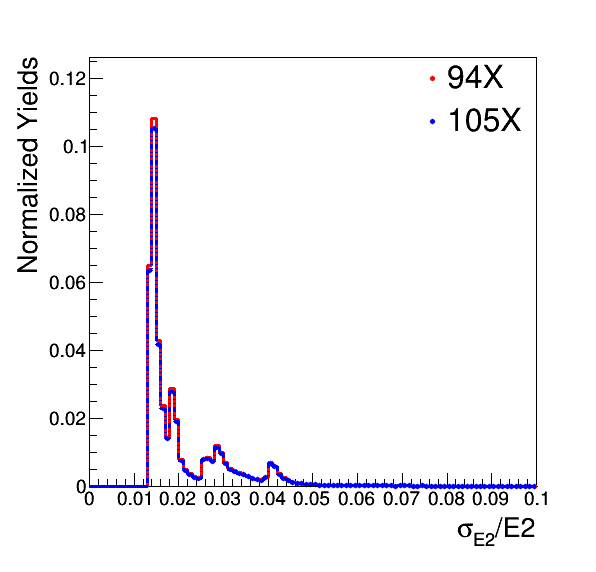

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


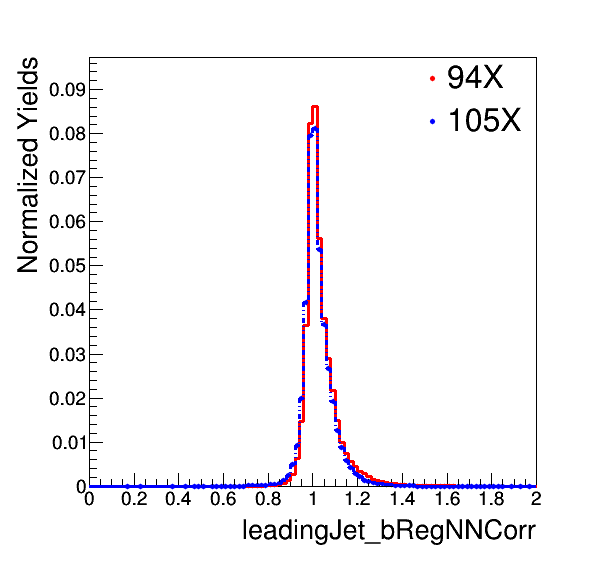

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


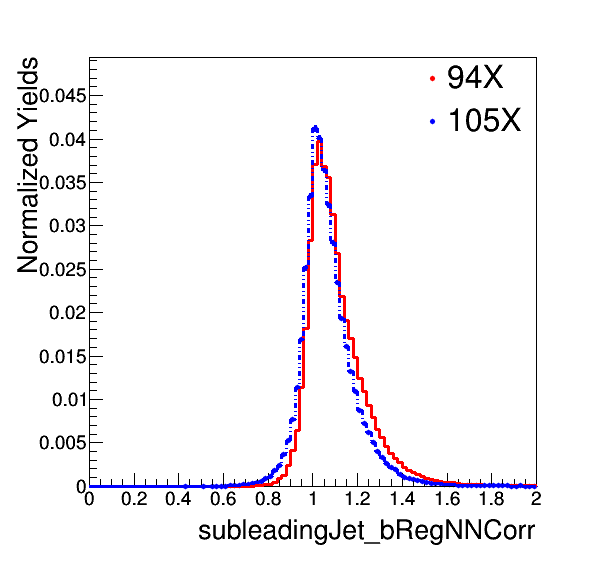

Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_Mjj_2017_94X_vs_105X_nonorm.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_Mjj_2017_94X_vs_105X_nonorm.png has been created
Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_dijet_pt_2017_94X_vs_105X_nonorm.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_dijet_pt_2017_94X_vs_105X_nonorm.png has been created
Info in <TCanvas::Print>: pdf file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_leadingJet_pt_2017_94X_vs_105X_nonorm.pdf has been created
Info in <TCanvas::Print>: png file /work/nchernya/HHbbgg_ETH_devel/Training/plots/newMicroAOD_18_06_2019/comparison_leadingJet_pt_2017_94X_vs_105X_nonorm.p

In [163]:
#c = TCanvas("c","c",900,900)
#c.Divide(5,4)

infile_94 = TFile(file_94)
infile_102 = TFile(file_102)
tree_dir = 'tagsDumper/trees/'

hists_list_94=[]
hists_list_102=[]

distributions = [['Mjj','M(jj) (GeV)',100,70,190],['dijet_pt','p_{T}(jj) (GeV)',100,0,700],
                     ['leadingJet_pt','leading jet p_{T} (GeV)',100,25,450], ['subleadingJet_pt','subleading jet p_{T} (GeV)',100,25,250], 
                    ['leadingJet_eta','leading jet #eta',100,-2.5,2.5],['subleadingJet_eta','subleading jet #eta',100,-2.5,2.5],
                    ['diHiggs_pt','p_{T}(HH) (GeV)',100,0,400], ['MX','MX (GeV)',100,250,1000],
                    ['absCosThetaStar_CS','|cos(#Theta*_{CS})|',100,0,1], ['rho','#rho',100,0,60],
                    ['CMS_hgg_mass','M(#gamma#gamma) (GeV)',50,110,140],['diphoton_pt','p_{T}(#gamma #gamma) (GeV)',100,0,700],
                    ['leadingPhoton_pt','p_{T}(#gamma_{1}) (GeV)',100,20,400], ['subleadingPhoton_pt','p_{T}(#gamma_{2}) (GeV)',100,20,250],
                    ['customLeadingPhotonIDMVA','custom IDMVA #gamma_{1}',100,0,1],['customSubLeadingPhotonIDMVA','custom IDMVA #gamma_{2}',100,0,1],
                    ['leadingPhotonSigOverE','#sigma_{E1}/E1',100,0,0.1],
                     ['sigmaMOverM','#sigma_{M}/M',100,0,0.1],
                    ['subleadingPhotonSigOverE','#sigma_{E2}/E2',100,0,0.1],
                ['leadingJet_bRegNNCorr','leadingJet_bRegNNCorr',100,0,2],['subleadingJet_bRegNNCorr','subleadingJet_bRegNNCorr',100,0,2]] 
bins = 100 



for num in range(0,len(distributions)):
    c = TCanvas("c","c",600,600)
    c = TCanvas("c","c",600,600)
    c.SetLeftMargin(0.15)
    c.SetBottomMargin(0.15)
    #c.cd(num+1)

    dist = distributions[num][0]
    bins = distributions[num][2]
    xmin = distributions[num][3]
    xmax = distributions[num][4]
    tree_94 = infile_94.Get(tree_dir+'GluGluToHHTo2B2G_nodesPlusSM_13TeV_madgraph_13TeV_DoubleHTag_0')
    hist_94 = TH1F("hist_94_%s"%dist,"hist_94_%s"%dist,bins,xmin,xmax)
    
    tree_102 = infile_102.Get(tree_dir+'GluGluToHHTo2B2G_node_9_13TeV_madgraph_correctedcfg_13TeV_DoubleHTag_0')
    hist_102 = TH1F("hist_102_%s"%dist,"hist_102_%s"%dist,bins,xmin,xmax)
    
    tree_94.Draw("%s>>hist_94_%s"%(dist,dist),"weight/puweight")
    tree_102.Draw("%s>>hist_102_%s"%(dist,dist),"weight/puweight")
    
    if num==0 : print '94/102 Integrals : ',hist_94.Integral(0,bins+1),' ',hist_102.Integral(0,bins+1)
        
   # hist_94.Scale(1./hist_94.Integral())
   # hist_102.Scale(1./hist_102.Integral())

    hist_94.SetLineColor(2)
    hist_94.SetMarkerColor(2)
    hist_102.SetLineColor(4)
    hist_102.SetMarkerColor(4)
    hist_102.SetLineStyle(8)


    ROOT.gStyle.SetOptTitle(1)
    ROOT.gStyle.SetOptStat(0)
    hist_102.SetTitle('')
   # hist_102.GetXaxis().SetTitleSize(.08) #for big canvas with all plots
   # hist_102.GetYaxis().SetTitleSize(.08) #for big canvas with all plots
    hist_102.GetXaxis().SetTitleSize(.05) 
    hist_102.GetYaxis().SetTitleSize(.05) 
    hist_102.GetYaxis().SetTitleOffset(1.3) 
    hist_102.GetXaxis().SetTitle('%s'%distributions[num][1])
    hist_102.GetYaxis().SetTitle('Normalized Yields')
    hist_102.GetYaxis().SetRangeUser(0,hist_102.GetMaximum()*1.2)

    
    hist_94.Draw("HISTsame")
    hists_list_94.append(hist_94)
    hist_102.Draw("HISTsame")
    hists_list_102.append(hist_102)
    
    
    leg = ROOT.TLegend(0.7,0.75,0.9,0.9)
    leg.AddEntry(hist_94,"94X" ,"P")
    leg.AddEntry(hist_102,"105X" ,"P")
    leg.SetFillStyle(-1)
    leg.SetBorderSize(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.06)
    leg.Draw("same")
    c.Draw()
    c.SaveAs(plot_dir+'comparison_%s_2017_94X_vs_105X_nonorm.pdf'%dist)
    c.SaveAs(plot_dir+'comparison_%s_2017_94X_vs_105X_nonorm.png'%dist)

#c.Draw()
#c.SaveAs(plot_dir+'comparison_2017_94X_vs_102X.pdf')
#c.SaveAs(plot_dir+'comparison_2017_94X_vs_102X.png')